# Code for the training loop

- Dataset loading
- Lightning module: Architecture and loss functions


## 1. Dataset Loading

In [1]:
from CellVision.data.datamodules import ImageDataModule
from CellVision.data.dataset import ImageDataset

import matplotlib.pyplot as plt

from CellVision.data.preprocessing.augmentations import SimpleAugmentor
from PIL import Image
import numpy as np

%matplotlib inline

In [2]:
root_data = '/home/sam/SCI/cellenONE_project/datasets'
name_train = 'train_SCI.lance'
name_test = 'test_Backup_SCI.lance'
name_val = 'val_ChristineErwin_SCI.lance'

In [3]:
datamodule = ImageDataModule(
    data_dir=root_data,
    batch_size=16,
    name_dataset_val=name_val,
    name_dataset_train=name_train,
    name_dataset_test=name_test,
    num_workers=12,
    dataset_cls=ImageDataset
)
datamodule.setup(stage='fit')

In [4]:
train_loader = datamodule.train_dataloader()

for batch in train_loader:
    break

Worker 1744178 initialized dataset
Worker 1744176 initialized dataset
Worker 1744181 initialized dataset
Worker 1744177 initialized dataset
Worker 1744179 initialized dataset
Worker 1744180 initialized dataset
Worker 1744182 initialized dataset
Worker 1744201 initialized dataset
Worker 1744200 initialized dataset
Worker 1744204 initialized dataset
Worker 1744203 initialized dataset
Worker 1744202 initialized dataset


In [5]:
def visualize_triplet(dtp_1, dtp_2, dtp_3, index=None):
    if isinstance(index, int):
        dtp_1 = dtp_1[index]
        dtp_2 = dtp_2[index]
        dtp_3 = dtp_3[index]

    fig, ax = plt.subplots(1,3,figsize=(10,4))

    ax[0].imshow(dtp_1.squeeze().numpy(), cmap='grey')
    ax[1].imshow(dtp_2.squeeze().numpy(), cmap='grey')
    ax[2].imshow(dtp_3.squeeze().numpy(), cmap='grey')

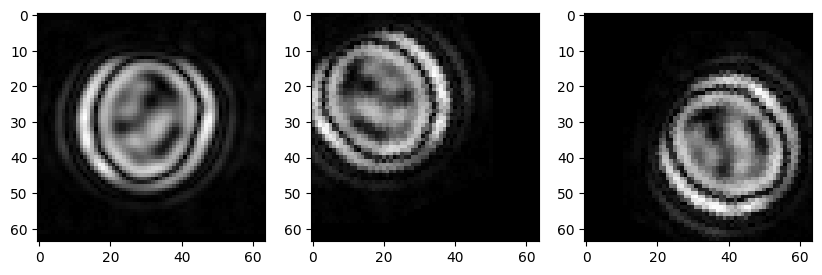

In [6]:
visualize_triplet(
    dtp_1=batch['targets'],
    dtp_2=batch['aug_1'],
    dtp_3=batch['aug_2'],
    index=4
)

## 2. Lightning module

In [7]:
from CellVision.model.architectures import BetaVAE
from CellVision.model.lightning import DenoisingBetaVAE_Lit

# Define model architecture
vae = BetaVAE(
    in_ch=1,
    z_dim=8,
    base_filters=16,
    hidden_feat=16,
    out_size=64,
    beta=1
)

vae_lightning = DenoisingBetaVAE_Lit(
    vae=vae,
    beta=1,
    lr=1e-5,
    recon_type='mse'
)

In [14]:
recon, z, mu, logvar = vae(batch['aug_1'])

In [15]:
loss = vae_lightning.training_step(batch, None)

/home/sam/miniconda3/envs/cellenone_env/lib/python3.14/site-packages/lightning/pytorch/core/module.py:449: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`


## 3. Wandb Integration

See train.py script